In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)

In [2]:
dat_BLYP = dict()

counter = 1

main = 'BLYP-D3-V5'

dir = f'./low_pressures/'
for i in range(0,6):
    x_range = np.loadtxt(dir + str(i) + '/outputs_v1/surf_co2_CO_angle_2.5.dat')[:,0]
    ang_1 = np.loadtxt(dir + str(i) + '/outputs_v1/surf_co2_CO_angle_2.5.dat')[:,1]
    #tot = ang_1
    ang_2 = np.loadtxt(dir + str(i) + '/outputs_v2/surf_co2_CO_angle_2.5.dat')[:,1]
    tot = [(ang_1[i] + ang_2[i])/2 for i in range(len(ang_2))]
    dat_BLYP[counter] = [x_range, tot]
    counter += 1
dir = f'./intermediate_pressures/'
for i in range(0,6):
    x_range = np.loadtxt(dir + str(i) + '/outputs_v1/surf_co2_CO_angle_2.5.dat')[:,0]
    ang_1 = np.loadtxt(dir + str(i) + '/outputs_v1/surf_co2_CO_angle_2.5.dat')[:,1]
    #tot = ang_1
    ang_2 = np.loadtxt(dir + str(i) + '/outputs_v2/surf_co2_CO_angle_2.5.dat')[:,1]
    tot = [(ang_1[i] + ang_2[i])/2 for i in range(len(ang_2))]
    dat_BLYP[counter] = [x_range, tot]
    counter += 1
dir = f'./high_pressures/'
for i in range(0,6):
    x_range = np.loadtxt(dir + str(i) + '/outputs_v1/surf_co2_CO_angle_2.5.dat')[:,0]
    ang_1 = np.loadtxt(dir + str(i) + '/outputs_v1/surf_co2_CO_angle_2.5.dat')[:,1]
    #tot = ang_1
    ang_2 = np.loadtxt(dir + str(i) + '/outputs_v2/surf_co2_CO_angle_2.5.dat')[:,1]
    tot = [(ang_1[i] + ang_2[i])/2 for i in range(len(ang_2))]
    dat_BLYP[counter] = [x_range, tot]
    counter += 1

avg_out = []
err_out = []
for i in range(len(dat_BLYP[1][0])):
    out = []
    for j in range(1,18):
        out.append(np.mean(dat_BLYP[j][1][i]))
    avg_out.append(np.average(out))
    err_out.append(np.std(out))

pressures = [1, 5, 10, 20, 30, 40, 60, 65, 70, 75, 80, 85, 85, 100, 200, 300, 400, 500]
pressures_res = [5, 10, 20, 30, 40, 65, 70, 75, 80, 85, 100, 200, 300, 400, 500]

In [10]:
bulk_ref = np.loadtxt('./VALIDATION/angle_dist.dat')
bulk_x = bulk_ref[:,0]
bulk_y = bulk_ref[:,1]


OSError: ./VALIDATION/angle_dist.dat not found.

# Full plot

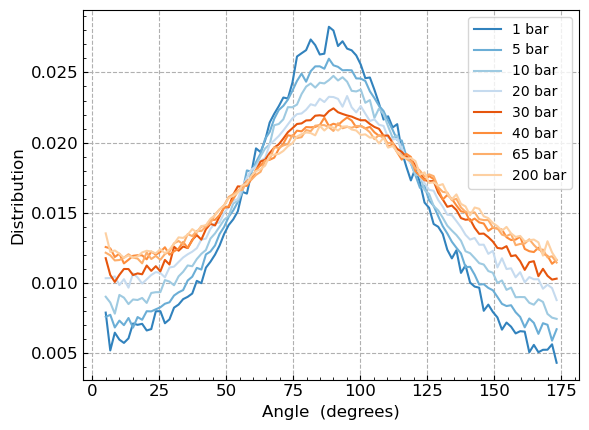

In [4]:
import seaborn as sns
sns.set_palette("tab20c",8)
# color 
no_files = 19
def colorFader(c1,c2,mix=0): #fade (linear interpolate) from color c1 (at mix=0) to c2 (mix=1)
    c1=np.array(mpl.colors.to_rgb(c1))
    c2=np.array(mpl.colors.to_rgb(c2))
    return mpl.colors.to_hex((1-mix)*c1 + mix*c2)
c1='purple'
c2='tab:green'
n = no_files - 1


fig,ax = plt.subplots()
# ----------------- PLOT -----------------
step = 5
#ax.plot(bulk_x[::step], bulk_y[::step], label='Bulk', color='black', linestyle='--',linewidth=0.8)

for i in range(1,19):
    if i in [1,2,3,4,5,6,8,15]:
        ax.plot(dat_BLYP[i][0], dat_BLYP[i][1], label=str(pressures[i-1]) + ' bar',
            #color=colorFader(c1,c2,(i-1)/n)
            )
        

ax.set_xlabel('Angle  (degrees)',size=12)
ax.set_ylabel('Distribution',size=12)
ax.tick_params(axis="x", which='both', direction="in", labelsize=12)
ax.tick_params(axis="y", which='both', direction="in", labelsize=12)
ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.yaxis.set_minor_locator(AutoMinorLocator())

ax.grid(ls='--')
ax.legend(loc='upper right')
plt.savefig('./RESULTS/FIGURE_4_angle.png',dpi=400,bbox_inches='tight',facecolor=fig.get_facecolor(), edgecolor='none')
plt.show()